Importing the necessary packages.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from scipy.stats import zscore

Reading the file

In [55]:
df=pd.read_excel(r"C:\Users\suhas\Downloads\marketing_campaign.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [56]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [57]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [58]:
for col in df.columns:
    print(col)

ID
Year_Birth
Education
Marital_Status
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


DATA CLEANING

In [59]:
#missing data
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values#calculating the missing values from highest number to lowest number

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [60]:
percent_missing_values=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent_missing_values#finding missing values percentage

Income                 0.010714
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

In [61]:
missing_data=pd.concat([missing_values,percent_missing_values],axis=1, keys=['missing_values','percent_missing_values'])
missing_data.head(20)# creating a seprate data frame for missing value and its corresponding percentage it contributes.

,missing_values,percent_missing_values
Income,24,0.010714
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000


Dealing with missing values ,there are two ways
.To drop 
.to fill



How do we decide?
if the data is missing above 15 percent we are going to drop and pretend it never exit(my assumption) but here i am going to replace with mean(since it is about income).

In [62]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Duplicated values

In [63]:
df.duplicated().sum()

0

In [64]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Observation:We can notice that there is no duplicates in the given dataset.

Converting the year of birth to Age

In [65]:
current_year = 2024 

# Calculate the age based on the birth year and the current year
df['Age'] = current_year - df['Year_Birth']

# Drop the original 'Year_Birth' column
df.drop(columns=['Year_Birth'], inplace=True)

# Save the modified DataFrame to a CSV file
df.to_csv('modified_data.csv', index=False)
df


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,57
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,1,0,0,3,11,0,78
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,43
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,68


SUMMARY STATISTICS

In [66]:
df.describe()

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196
min,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,2828.250000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,5458.500000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,8427.750000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,11191.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000
std,3246.662198,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069


1. Customer Profile:
    
>The dataset comprises 2240 customers with diverse demographics.

>The average birth year is around 1968, with a wide range from 1893 to 1996.

>Incomes vary significantly, with an average of rupees 52,247 ,and a range from rupees 1,730 to 666,666.

2. Household Composition:
    
>On average, households have approximately 0.44 young children (Kidhome) and 0.51 teenagers (Teenhome).

3. Enrollment and Recency:
    
>Customers enrolled over a period from July 30, 2012, to June 29, 2014, with an average enrollment date around July 10, 2013.

>The average recency (days since the last purchase) is approximately 49 days, varying from recent purchases to a maximum of 99 days.

4. Spending Behavior:
    
>Customers exhibit diverse spending patterns across product categories (MntWines, MntFruits, MntMeatProducts, etc.).

>The average number of web visits per month is approximately 5.32.

5. Marketing Campaigns:
    
>Acceptance rates for individual marketing campaigns (AcceptedCmp1 to AcceptedCmp5) range from 6.43% to 7.46%.

>Around 14.91% of customers responded positively to the overall marketing campaign (Response).

6. Customer Feedback:
    
>Approximately 7.28% of customers have registered complaints.

7. Fixed Costs and Revenues:
    
>The columns Z_CostContact and Z_Revenue provide fixed costs and revenues for contacts, with constant values of 3 and 11, respectively.

8. Complaints:

>The Complain column indicates whether a customer has filed a complaint.

>On average, around 7.28% of customers have registered complaints.

9. Campaign Response (Response):

>The Response column represents whether the customer responded to the marketing campaign.

>On average, around 14.91% of customers responded.

10. Number of Purchases and Web Visits:

>Columns like NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, and NumWebVisitsMonth provide 
information on the number of purchases and web visits.

>The average number of web visits per month is around 5.32.

Distribution of Categorical Variables:

In [67]:
# Explore distribution of categorical variables
education_distribution = df['Education'].value_counts()
marital_status_distribution = df['Marital_Status'].value_counts()

print("Education Distribution:")
print(education_distribution)

print("\nMarital Status Distribution:")
print(marital_status_distribution)


Education Distribution:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital Status Distribution:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


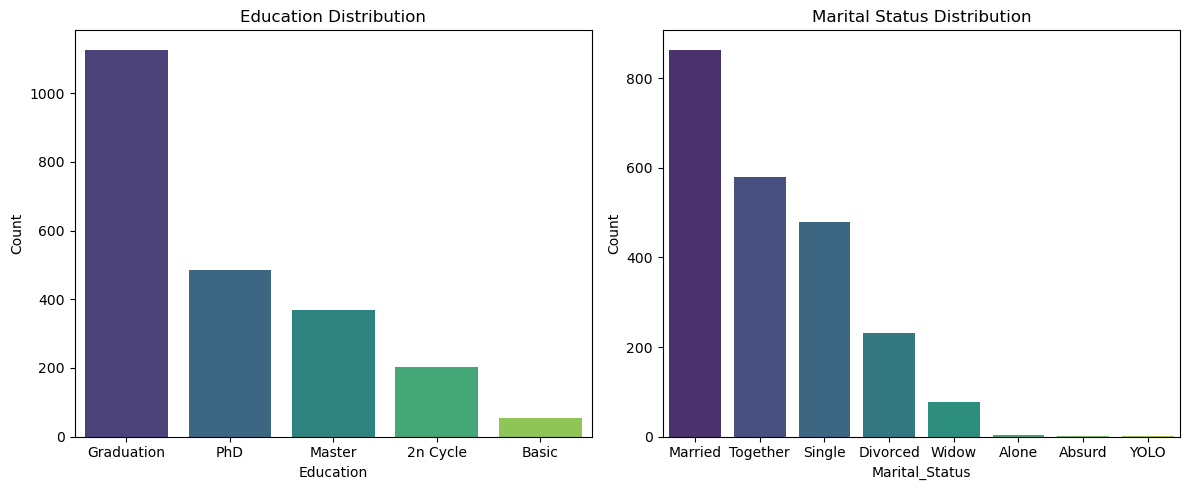

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Education Distribution
sns.barplot(x=education_distribution.index, y=education_distribution.values, ax=axes[0], palette='viridis')
axes[0].set_title('Education Distribution')
axes[0].set_ylabel('Count')

# Plot Marital Status Distribution
sns.barplot(x=marital_status_distribution.index, y=marital_status_distribution.values, ax=axes[1], palette='viridis')
axes[1].set_title('Marital Status Distribution')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


Encoding the categorical column using LabelEncoder

In [75]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Marital_Status' and 'Education'
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Education'] = label_encoder.fit_transform(df['Education'])

# Save the encoded DataFrame to a CSV file
df.to_csv('encoded_data.csv', index=False)
df


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Marital_Status_Encoded,Education_Encoded
0,5524,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,67,4,2
1,2174,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,70,4,2
2,4141,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,59,5,2
3,6182,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,40,5,2
4,5324,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,43,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,3,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,3,11,0,57,3,2
2236,4001,4,5,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,3,11,0,78,5,4
2237,7270,2,2,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,3,11,0,43,2,2
2238,8235,3,5,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,3,11,0,68,5,3


In [81]:
unique_counts_education = df['Education'].value_counts()
unique_counts_marital_status = df['Marital_Status'].value_counts()

print("Unique counts for Education:")
print(unique_counts_education)

print("\nUnique counts for Marital_Status:")
print(unique_counts_marital_status)



Unique counts for Education:
Education
2    1127
4     486
3     370
0     203
1      54
Name: count, dtype: int64

Unique counts for Marital_Status:
Marital_Status
3    864
5    580
4    480
2    232
6     77
1      3
0      2
7      2
Name: count, dtype: int64


Encoded Education Distribution:
    
>2 (Graduation): 1127

>4 (PhD): 486

>3 (Master): 370

>0 (2n Cycle): 203

>1 (Basic): 54
    
Encoded Marital Status Distribution:
    
>3 (Married): 864

>5 (Together): 580

>4 (Single): 480

>2 (Divorced): 232

>6 (Widow): 77

>1 (Alone): 3

>0 (Absurd): 2

>7 (YOLO): 2

Income Distribution:

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


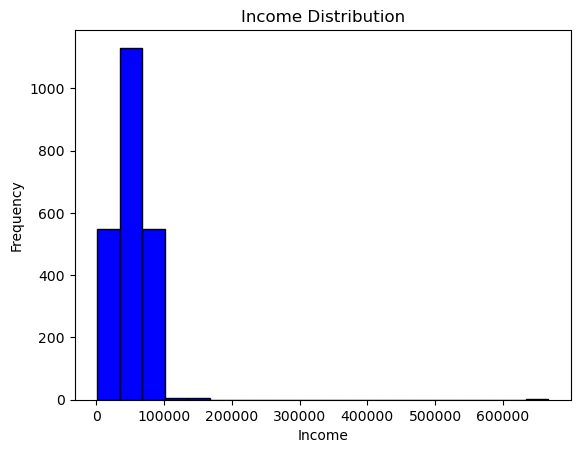

In [15]:
# Plot income distribution

# Check the summary statistics of the 'Income' column
print(df['Income'].describe())

# Create a histogram to visualize the distribution of 'Income'
plt.hist(df['Income'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()


> There's a significant difference between the maximum value (max: 666666) and the majority of the data, which might be causing the histogram to be skewed and not fully display the distribution. 

>One way to handle this is to set the x-axis limits to focus on the majority of the data and then separately visualize the extreme values.

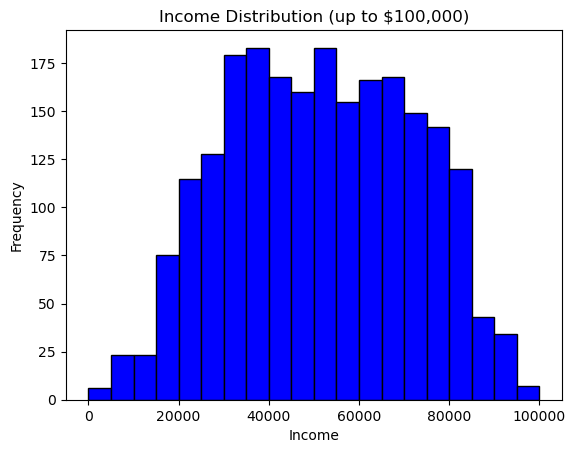

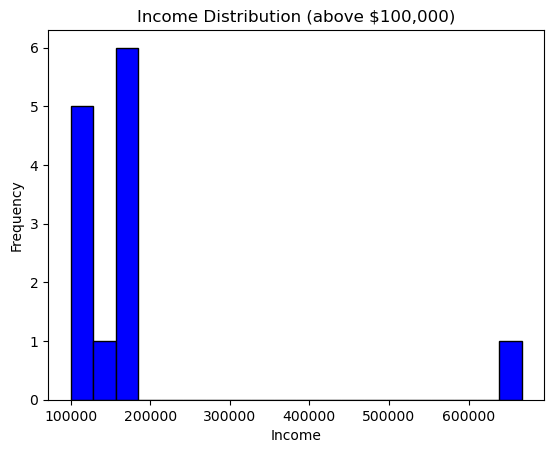

In [16]:

# x-axis limits to focus on the majority of the data
plt.hist(df['Income'], bins=20, color='blue', edgecolor='black', range=(0, 100000))
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution (up to $100,000)')
plt.show()

# Separate visualization for extreme values
plt.hist(df['Income'], bins=20, color='blue', edgecolor='black', range=(100001, 666666))
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution (above $100,000)')
plt.show()


correlation analysis

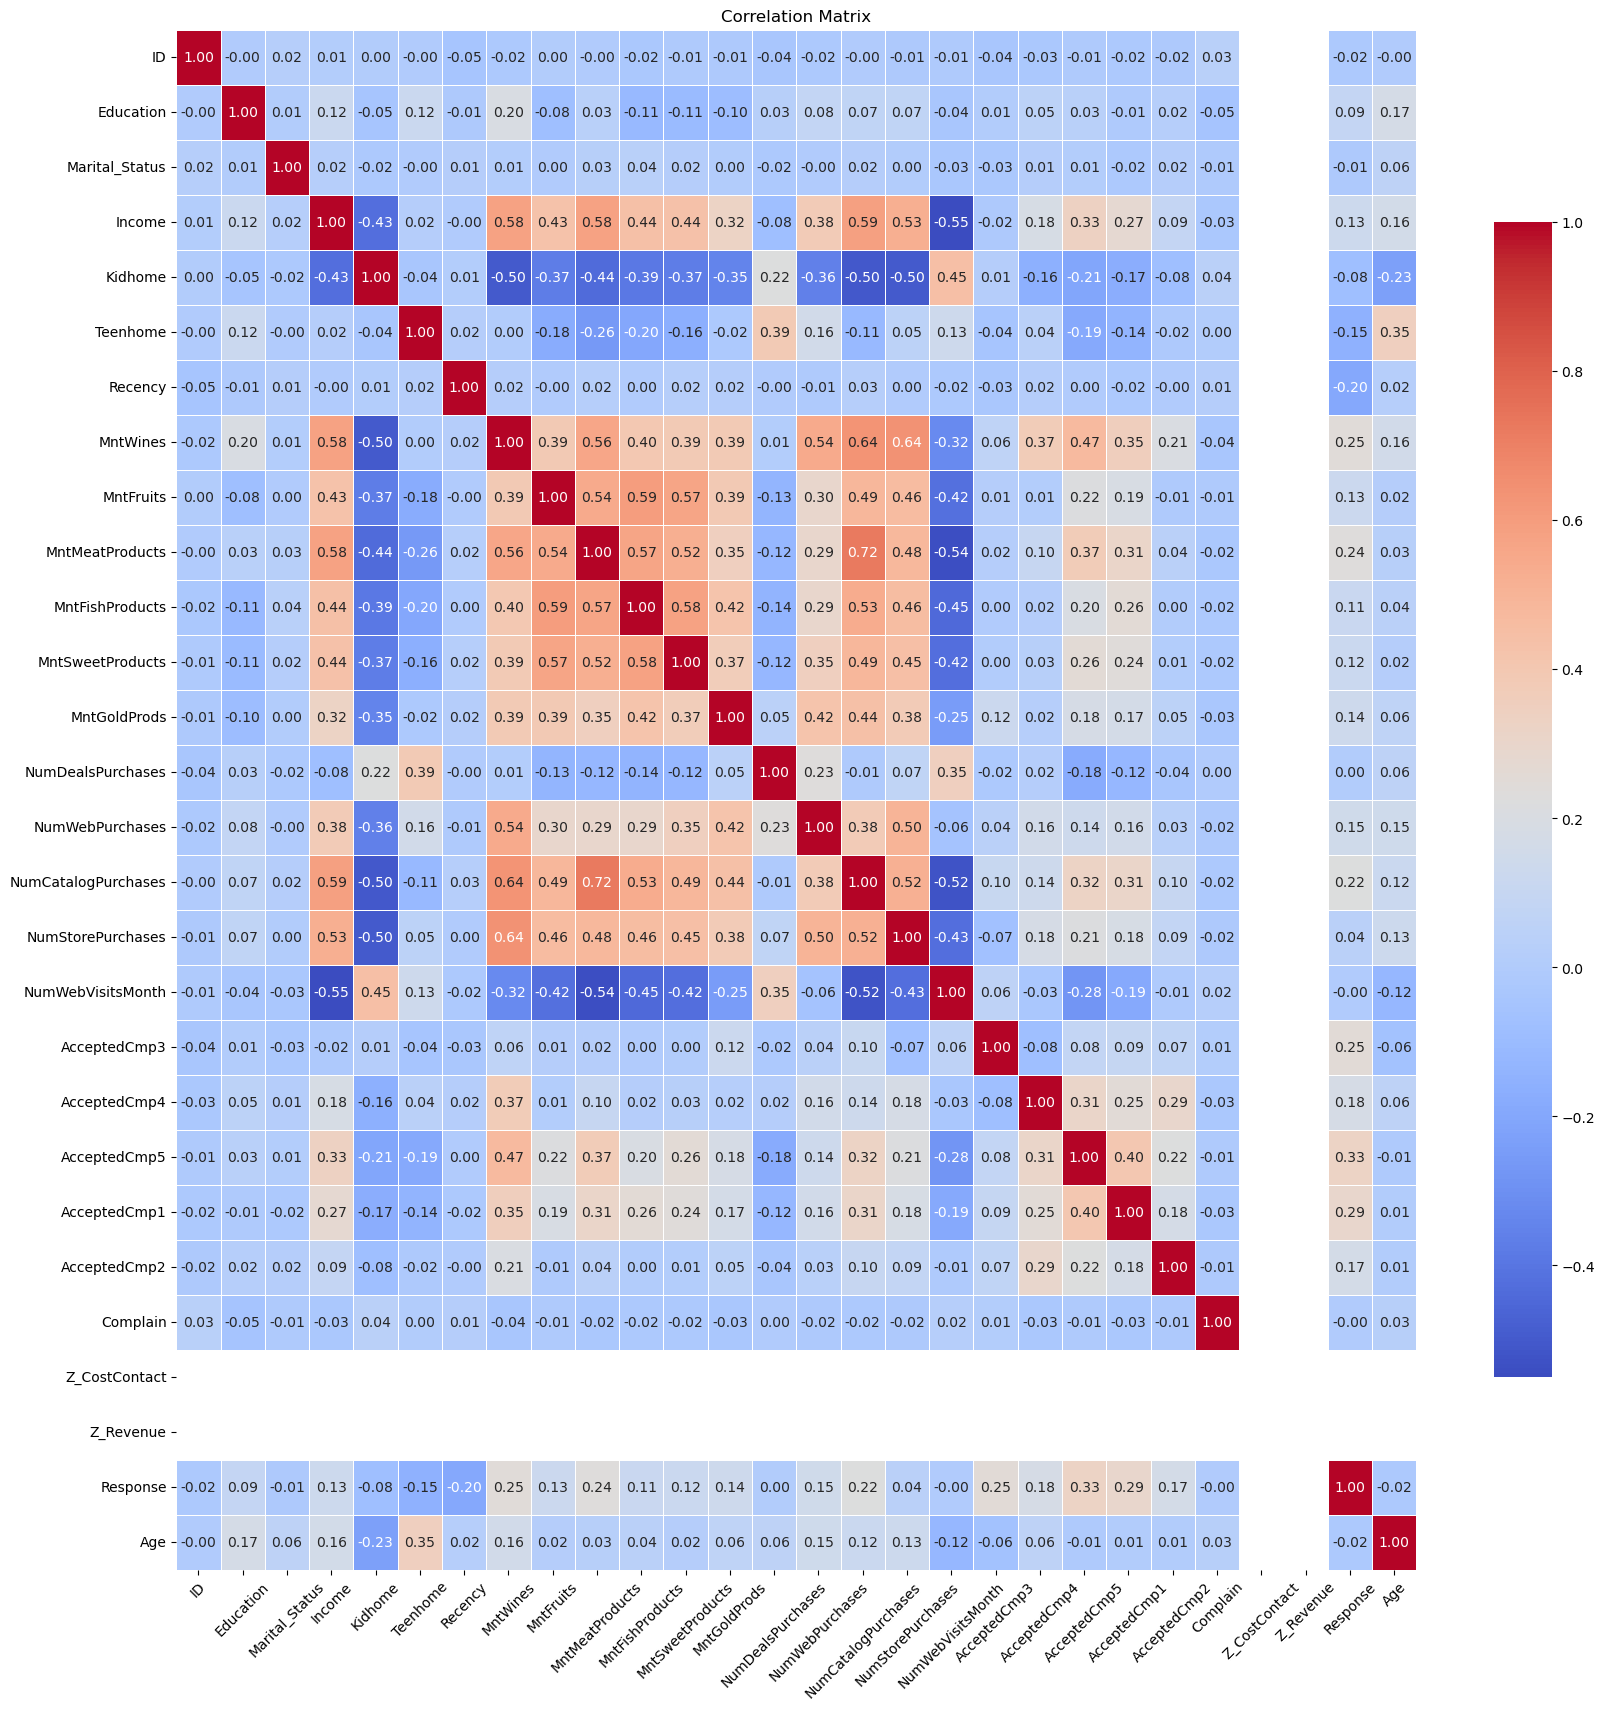

In [82]:
# Identify numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Visualize correlation matrix using a heatmap
# Adjust figure size and rotation of tick labels
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()


1. Demographic Information:

>Year_Birth has a weak negative correlation with Income (-0.16), suggesting that younger customers tend to have slightly higher incomes.

>Income is negatively correlated with the number of children (Kidhome) (-0.43) and positively correlated with the number of teenagers (Teenhome) (0.02). This indicates that higher-income customers may have fewer young children but more teenagers.

2. Customer Behavior and Purchasing Patterns:

>The amount spent on various product categories (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) is positively correlated with each other, with the strongest correlation observed between MntWines and MntMeatProducts (0.58). This suggests that customers who spend more in one category tend to spend more in others.
NumDealsPurchases (number of purchases with deals) has a weak positive correlation with NumStorePurchases (0.22) and NumCatalogPurchases (0.33), suggesting that customers who engage in deal purchases may also make purchases from physical stores and catalogs.

>The number of web visits per month (NumWebVisitsMonth) is negatively correlated with the amount spent on various product categories, indicating that customers who spend more may visit the website less frequently.

3. Marketing Campaign Responses:

>There are positive correlations between accepting certain marketing campaigns (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5) and the final Response variable. This suggests that customers who accepted previous marketing campaigns are more likely to respond to the latest campaign.

>AcceptedCmp3 has a relatively higher positive correlation with the final Response variable compared to other campaigns.

4 .Other Observations:

>Recency (number of days since the last purchase) has a negative correlation with Response (-0.20), implying that more recent customers are more likely to respond to the latest campaign.

>Z_CostContact and Z_Revenue are constants and do not vary in the dataset. Therefore, they have NaN correlations with other variables, and no meaningful insights can be derived from them.

5. Complaints:

>The column Complain has a weak positive correlation with the Response variable (0.0017). This suggests that customers who have previously complained are slightly more likely to respond to the latest marketing campaign.

6. Customer Purchasing Channels:

>NumWebPurchases (number of purchases made through the website) is positively correlated with NumCatalogPurchases (0.16) and NumStorePurchases (0.04). This implies that customers who make more web purchases also tend to make more catalog and store purchases, though the correlations are not very strong.

7. Acceptance Rates of Marketing Campaigns:

>The acceptance rates for marketing campaigns vary, with AcceptedCmp3 having the highest correlation with the final Response variable (0.254). This suggests that the third campaign may have a stronger influence on the overall campaign response.

8. Age and Marketing Responses:

>While not explicitly analyzed in the correlation matrix, you can derive age information from the Year_Birth variable. Exploring the relationship between age groups and marketing responses could provide valuable insights into the target audience for successful campaigns.

9.Spending Habits and Campaign Responses:

>It would be beneficial to explore how different spending patterns relate to campaign responses. For example, customers who spend more on wines or high-value gold products may respond differently to marketing campaigns compared to those who focus on basic necessities.

10.Time Since Customer Enrollment (Dt_Customer):

>The Dt_Customer column represents the date when the customer was first enrolled. Analyzing this variable could reveal trends or patterns related to customer loyalty and the impact of the duration of the customer relationship on campaign responses.

11. Interaction between Family Size and Spending:

>Exploring how family size (combined Kidhome and Teenhome) correlates with spending behavior could provide insights into the preferences and needs of different family types.

Customer Acceptance of Marketing Campaigns:

In [23]:
# Calculate acceptance rates for marketing campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df[campaign_columns].mean()

print("Acceptance Rates for Marketing Campaigns:")
print(acceptance_rates)


Acceptance Rates for Marketing Campaigns:
AcceptedCmp1    0.064286
AcceptedCmp2    0.013393
AcceptedCmp3    0.072768
AcceptedCmp4    0.074554
AcceptedCmp5    0.072768
dtype: float64


In [24]:
# Calculate acceptance rates for marketing campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df[campaign_columns].mean() * 100  # Multiply by 100 to convert to percentages

# Print acceptance rates as percentages
print("Acceptance Rates for Marketing Campaigns:")
for campaign, rate in acceptance_rates.items():
    print(f"{campaign}: {rate:.2f}%")


Acceptance Rates for Marketing Campaigns:
AcceptedCmp1: 6.43%
AcceptedCmp2: 1.34%
AcceptedCmp3: 7.28%
AcceptedCmp4: 7.46%
AcceptedCmp5: 7.28%


1. Variability in Acceptance Rates:

>There is variability in the acceptance rates across different marketing campaigns.

>AcceptedCmp4 has the highest acceptance rate at 7.46%, followed closely by AcceptedCmp3 and AcceptedCmp5, both at 7.28%.

>AcceptedCmp1 has a slightly lower acceptance rate compared to the other campaigns, standing at 6.43%.

>AcceptedCmp2 has the lowest acceptance rate among the campaigns, indicating potential differences in the effectiveness or attractiveness of this particular campaign.

2. Comparing Campaigns:

>AcceptedCmp3 and AcceptedCmp5 share the same acceptance rate at 7.28%, suggesting a similar impact or appeal for these two campaigns.

>AcceptedCmp4 stands out with the highest acceptance rate, indicating that this campaign has been relatively more successful in engaging customers.

3. General Low Acceptance Rates:

>Overall, the acceptance rates for all campaigns are relatively low, ranging from 6.43% to 7.46%.

>These low acceptance rates may signal challenges in capturing the attention and interest of a significant portion of the customer base.

4. Opportunities for Improvement:

>Given the overall low acceptance rates, there may be opportunities to analyze and refine the marketing strategies to enhance campaign effectiveness.

>Understanding customer preferences, targeting specific segments, or adjusting campaign content based on past performance could be avenues for improvement.

5. Consistency in Moderate to High Acceptance Rates:

>Despite the low overall rates, campaigns AcceptedCmp3, AcceptedCmp4, and AcceptedCmp5 have achieved relatively moderate to high acceptance rates, indicating some success in engaging certain segments of the customer base.

In [45]:
accepted_cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Count the occurrences of 0 and 1 in each 'AcceptedCmp' column
for column in accepted_cmp_columns:
    counts = df[column].value_counts()
    print(f"Counts for {column}:\n{counts}\n")

Counts for AcceptedCmp1:
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

Counts for AcceptedCmp2:
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

Counts for AcceptedCmp3:
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

Counts for AcceptedCmp4:
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

Counts for AcceptedCmp5:
AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64



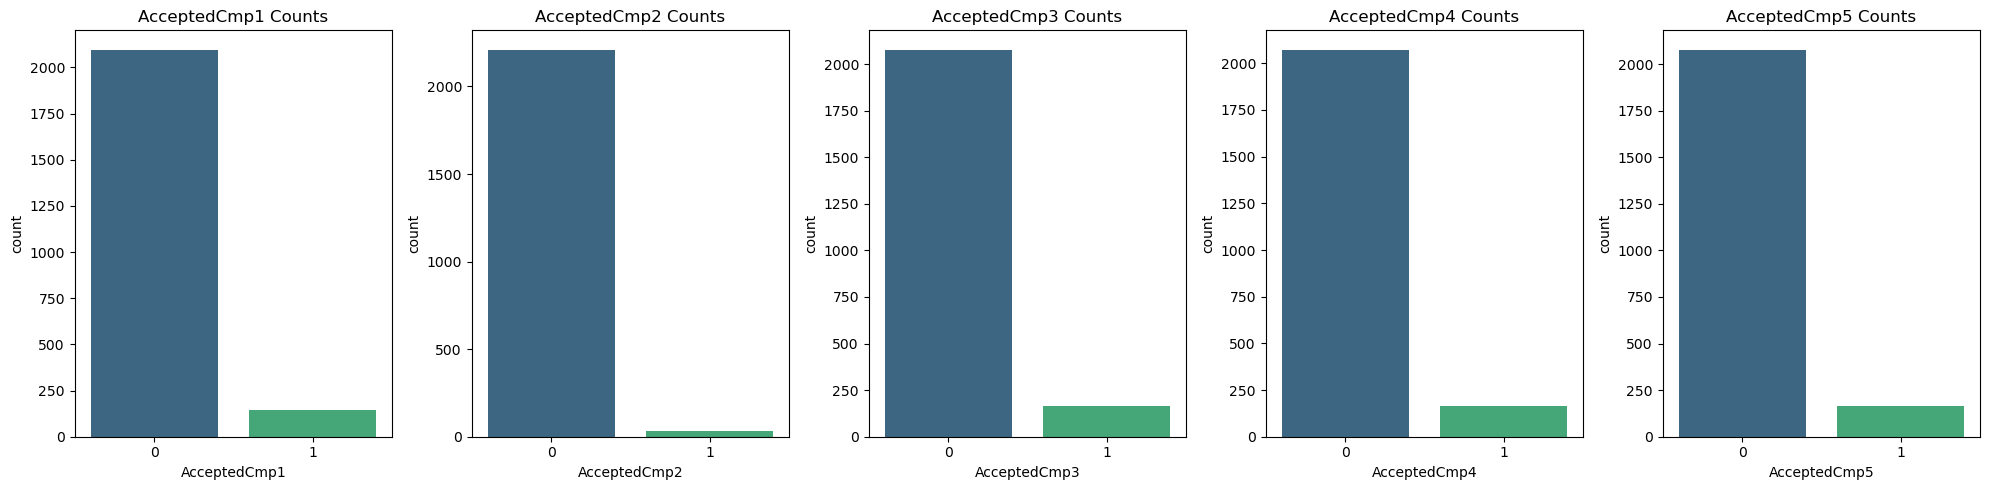

In [46]:
# Selecting relevant columns for campaign acceptance analysis
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Plot bar plots for each campaign
for col, ax in zip(campaign_columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax, palette='viridis')
    ax.set_title(f'{col} Counts')

# Adjust layout
plt.tight_layout()
plt.show()


1. AcceptedCmp1:

Not accepted: 2096 customers 

Accepted: 144 customers

Acceptance Rate: Approximately 6.43%
    
2. AcceptedCmp2:

Not accepted: 2210 customers

Accepted: 30 customers

Acceptance Rate: Approximately 1.34%
    
3. AcceptedCmp3:

Not accepted: 2077 customers

Accepted: 163 customers

Acceptance Rate: Approximately 7.28%
    
4. AcceptedCmp4:

Not accepted: 2073 customers

Accepted: 167 customers

Acceptance Rate: Approximately 7.47%
    
5. AcceptedCmp5:

Not accepted: 2077 customers

Accepted: 163 customers

Acceptance Rate: Approximately 7.28%

Response Analysis:

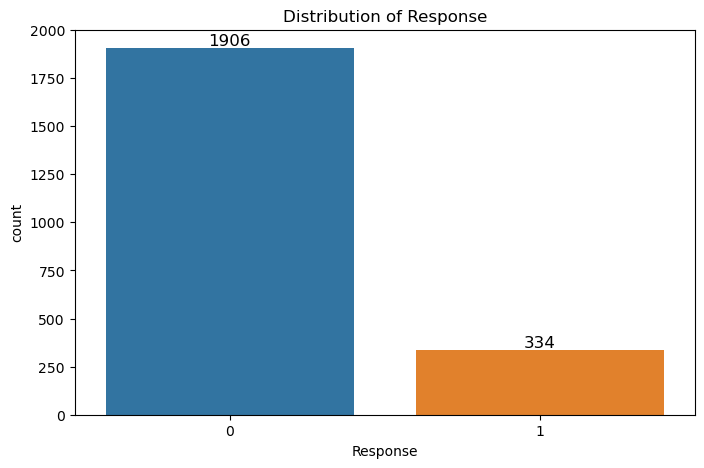

In [25]:
# Count plot for Response variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', data=df)
# Display count values inside the bars
for count, p in zip(df['Response'].value_counts(), plt.gca().patches):
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), count, ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Response')
plt.show()


Purchase behavior analysis

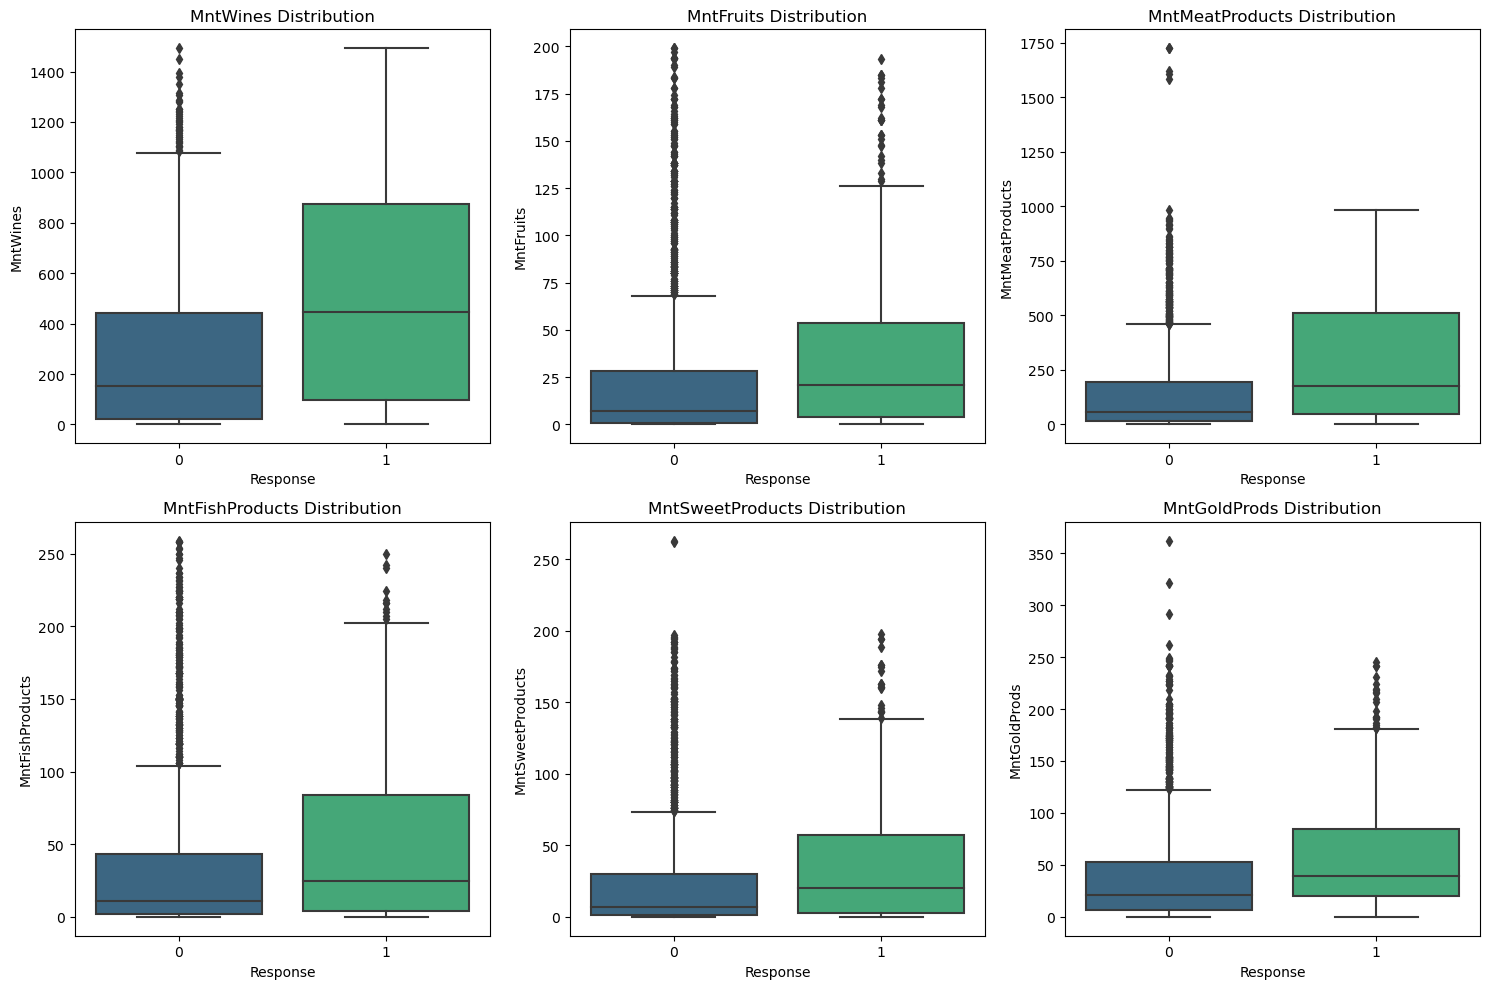

In [26]:

# Selecting columns for purchase behavior analysis
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot box plots for each spending category
for col, ax in zip(purchase_columns, axes.flatten()):
    sns.boxplot(x='Response', y=col, data=df, ax=ax, palette='viridis')
    ax.set_title(f'{col} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Purchases analysis

In [118]:
# Select 'NumPurchases' columns
num_purchases_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Display unique values for each 'NumPurchases' column
for column in num_purchases_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:", unique_values)
    print()


Unique values for NumDealsPurchases: [ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11]

Unique values for NumWebPurchases: [ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25]

Unique values for NumCatalogPurchases: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]

Unique values for NumStorePurchases: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]



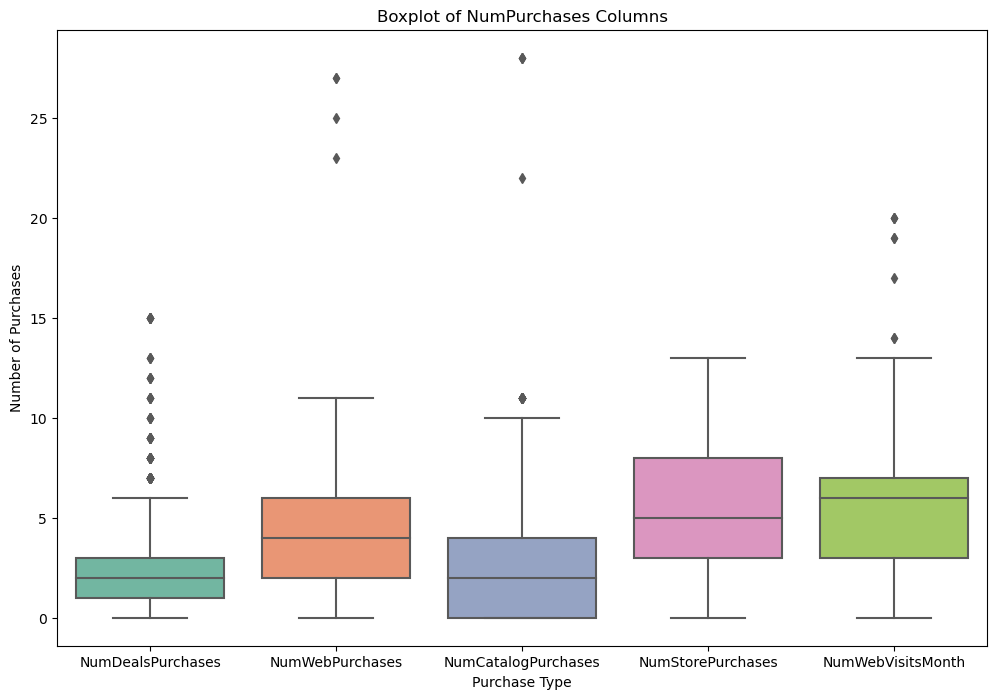

In [20]:

# Select 'NumPurchases' columns
num_purchases_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']

# Boxplot to visualize the distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_purchases_columns], palette='Set2')
plt.title('Boxplot of NumPurchases Columns')
plt.xlabel('Purchase Type')
plt.ylabel('Number of Purchases')
plt.show()




In [ ]:
Relationship between NumWebPurchases and NumWebVisitsMonth

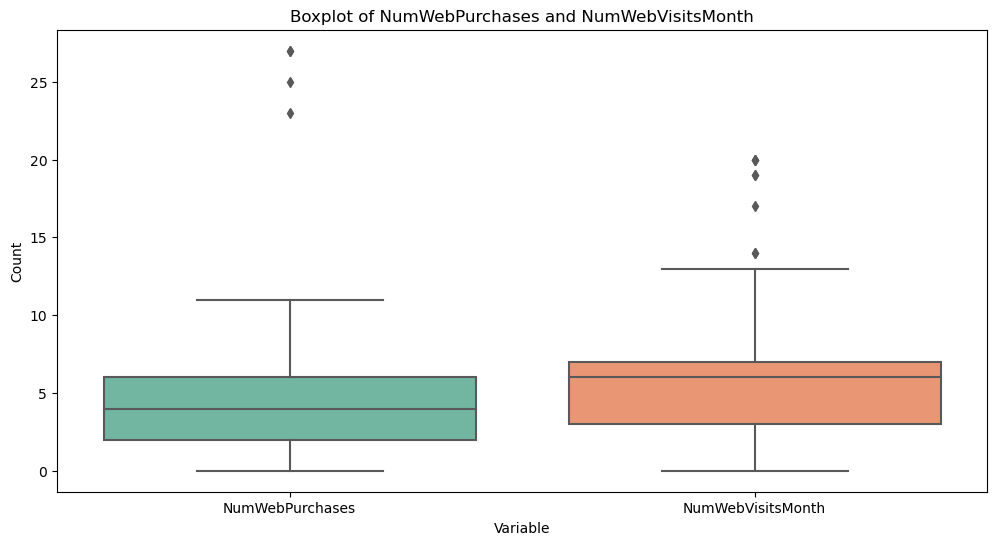

C:\Users\suhas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


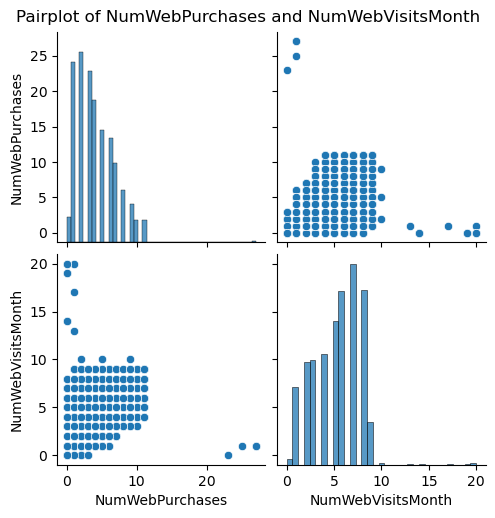

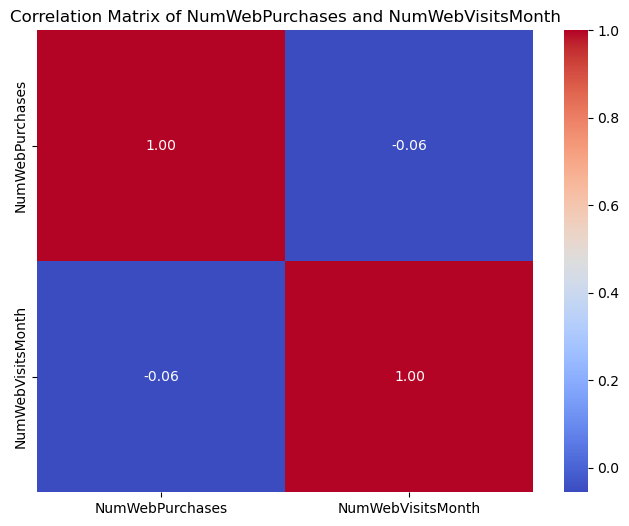

In [21]:
web_columns = ['NumWebPurchases', 'NumWebVisitsMonth']

# Boxplot to visualize the distribution of NumWebPurchases and NumWebVisitsMonth
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[web_columns], palette='Set2')
plt.title('Boxplot of NumWebPurchases and NumWebVisitsMonth')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.show()

# Pairplot to explore relationships between NumWebPurchases and NumWebVisitsMonth
sns.pairplot(df[web_columns])
plt.suptitle('Pairplot of NumWebPurchases and NumWebVisitsMonth', y=1.02)
plt.show()

# Correlation matrix to quantify relationships
correlation_matrix_web = df[web_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_web, annot=True, cmap='coolwarm', fmt="1.2f")
plt.title('Correlation Matrix of NumWebPurchases and NumWebVisitsMonth')
plt.show()


Visualisation of Age

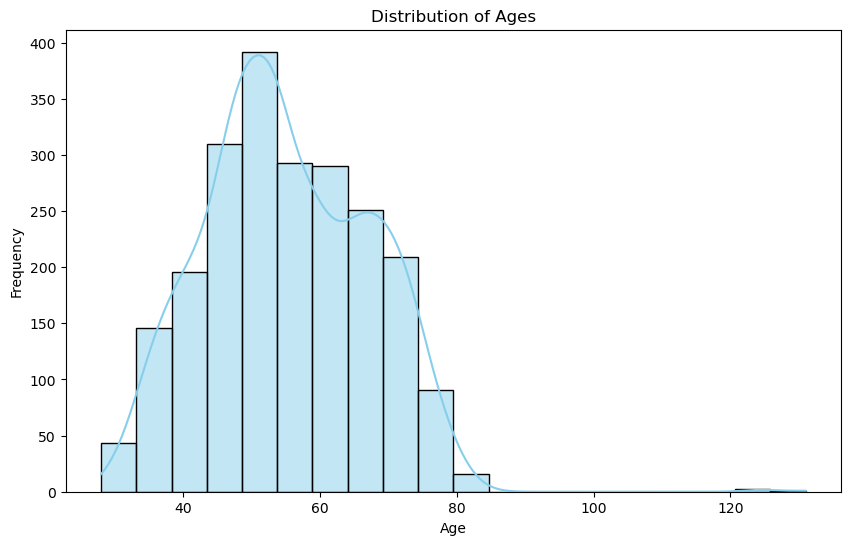

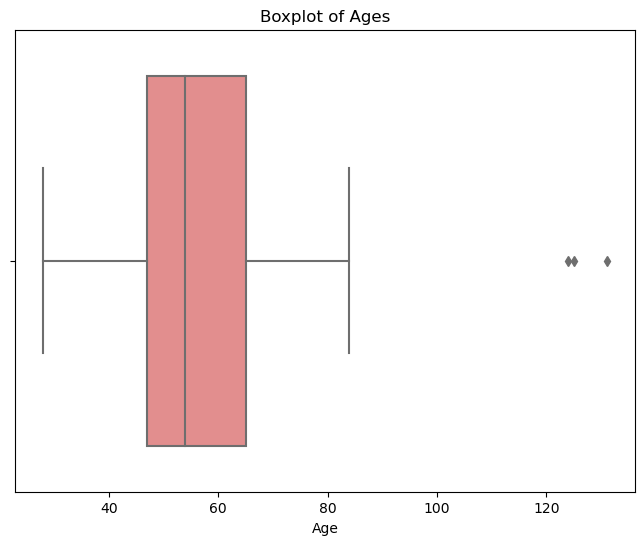

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64


C:\Users\suhas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


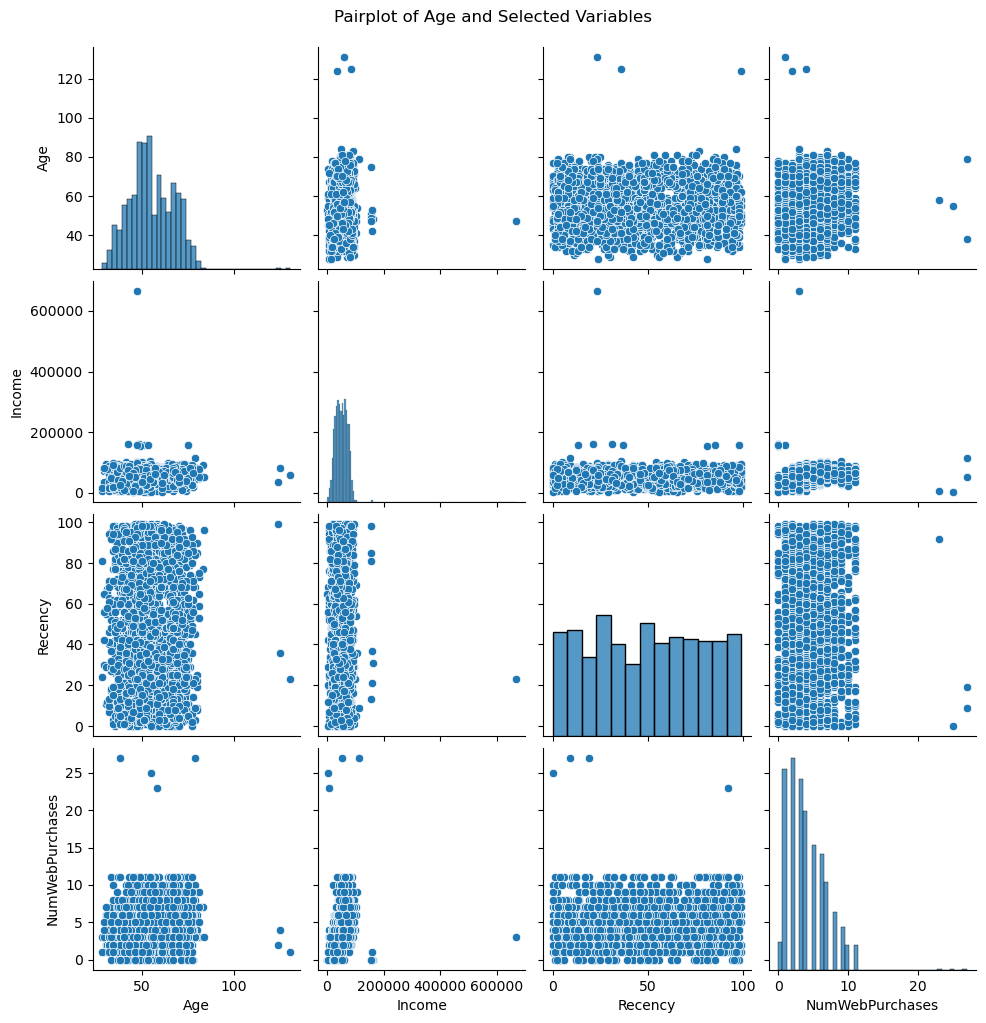

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram to visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='lightcoral')
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.show()

# Summary statistics for age
age_summary = df['Age'].describe()
print(age_summary)

# Pairplot to explore relationships with other variables
sns.pairplot(df, vars=['Age', 'Income', 'Recency', 'NumWebPurchases'])
plt.suptitle('Pairplot of Age and Selected Variables', y=1.02)
plt.show()


Visualisation For Family

In [25]:
# Count occurrences of different values in 'Kidhome'
kidhome_counts = df['Kidhome'].value_counts()

# Count occurrences of different values in 'Teenhome'
teenhome_counts = df['Teenhome'].value_counts()

# Display the counts
print("Kidhome counts:\n", kidhome_counts)
print("\nTeenhome counts:\n", teenhome_counts)


Kidhome counts:
 Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

Teenhome counts:
 Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


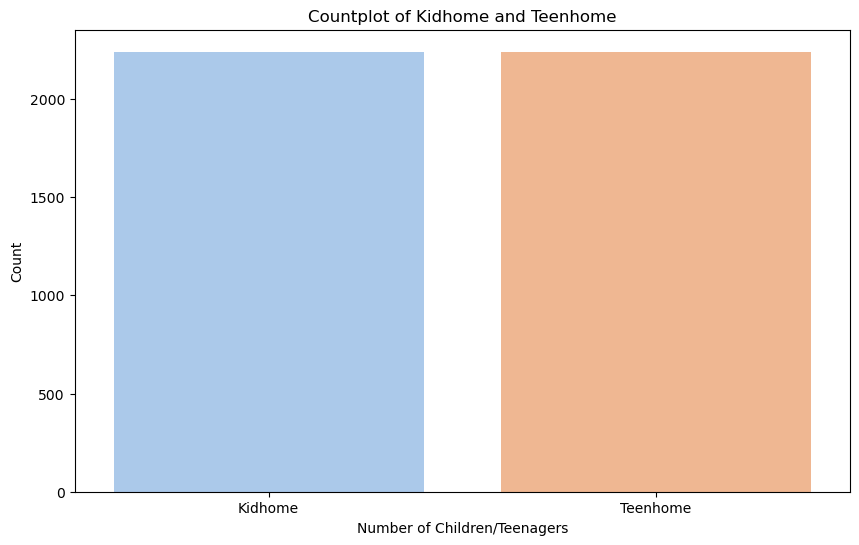

C:\Users\suhas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


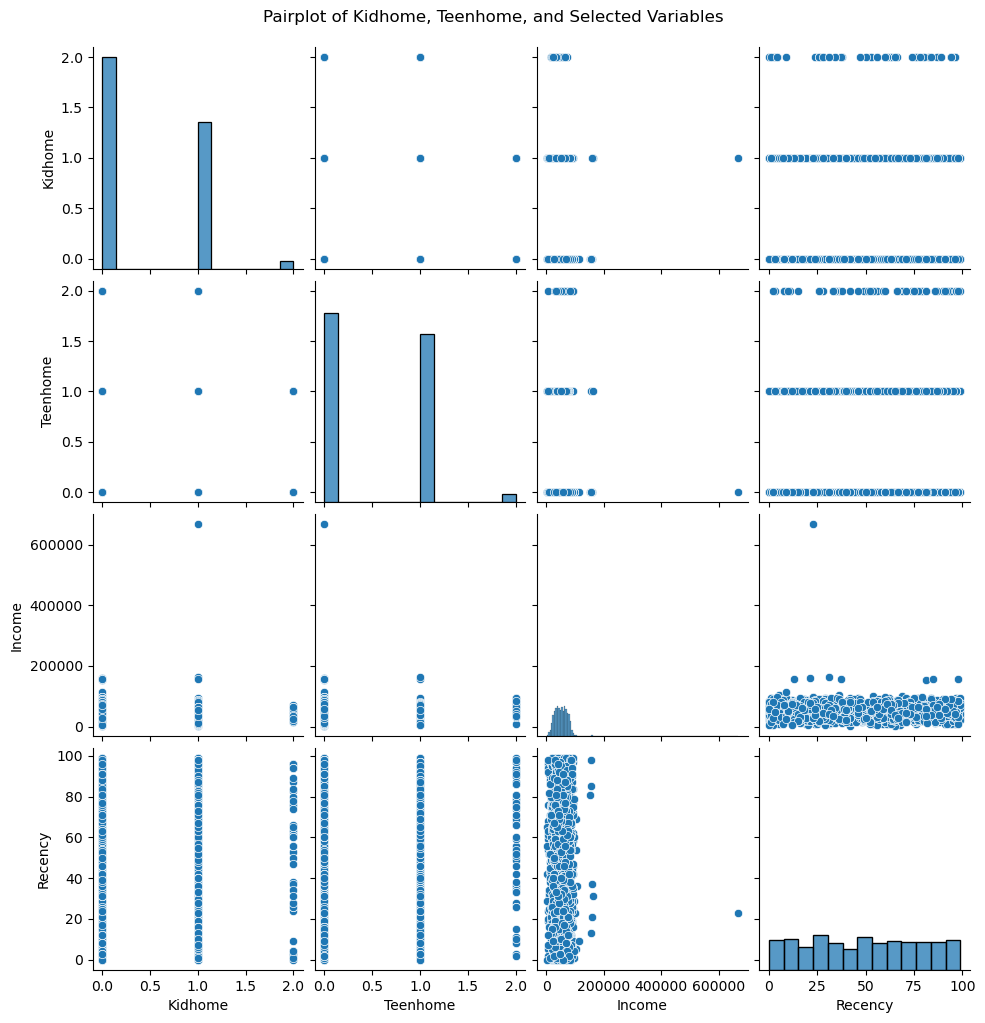

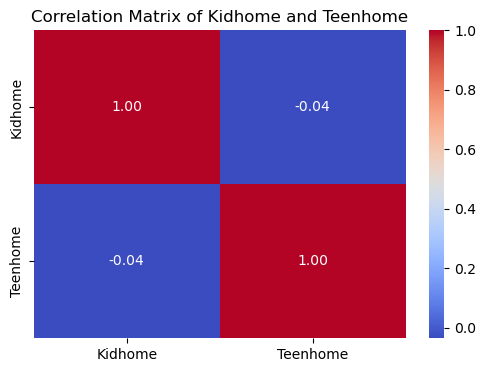

In [24]:
family_columns = ['Kidhome', 'Teenhome']

# Countplot to visualize the distribution of Kidhome and Teenhome
plt.figure(figsize=(10, 6))
sns.countplot(data=df[family_columns], palette='pastel')
plt.title('Countplot of Kidhome and Teenhome')
plt.xlabel('Number of Children/Teenagers')
plt.ylabel('Count')
plt.show()

# Pairplot to explore relationships between Kidhome, Teenhome, and other variables
sns.pairplot(df, vars=['Kidhome', 'Teenhome', 'Income', 'Recency'])
plt.suptitle('Pairplot of Kidhome, Teenhome, and Selected Variables', y=1.02)
plt.show()

# Correlation matrix to quantify relationships
correlation_matrix_family = df[family_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_family, annot=True, cmap='coolwarm', fmt="1.2f")
plt.title('Correlation Matrix of Kidhome and Teenhome')
plt.show()


Visualisation For Recency

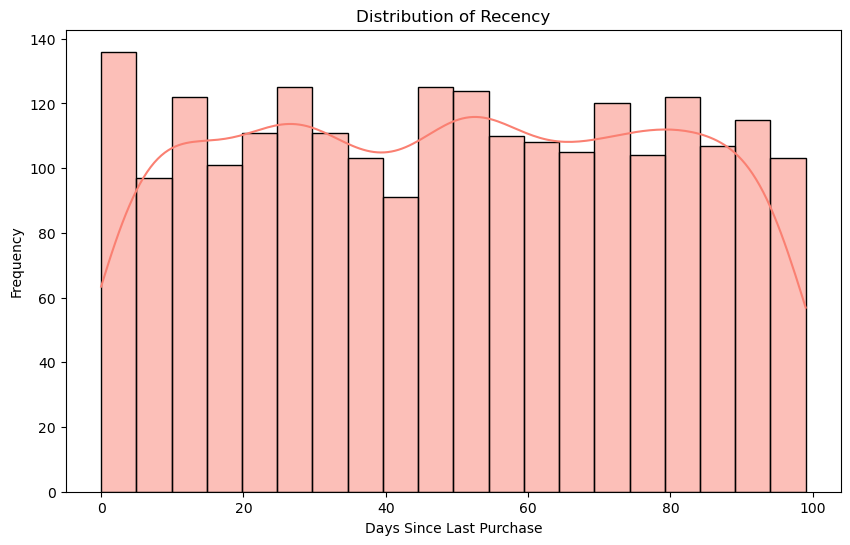

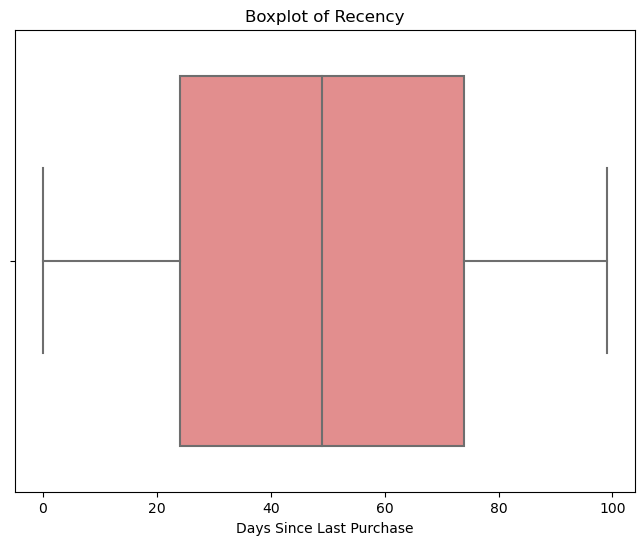

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


C:\Users\suhas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


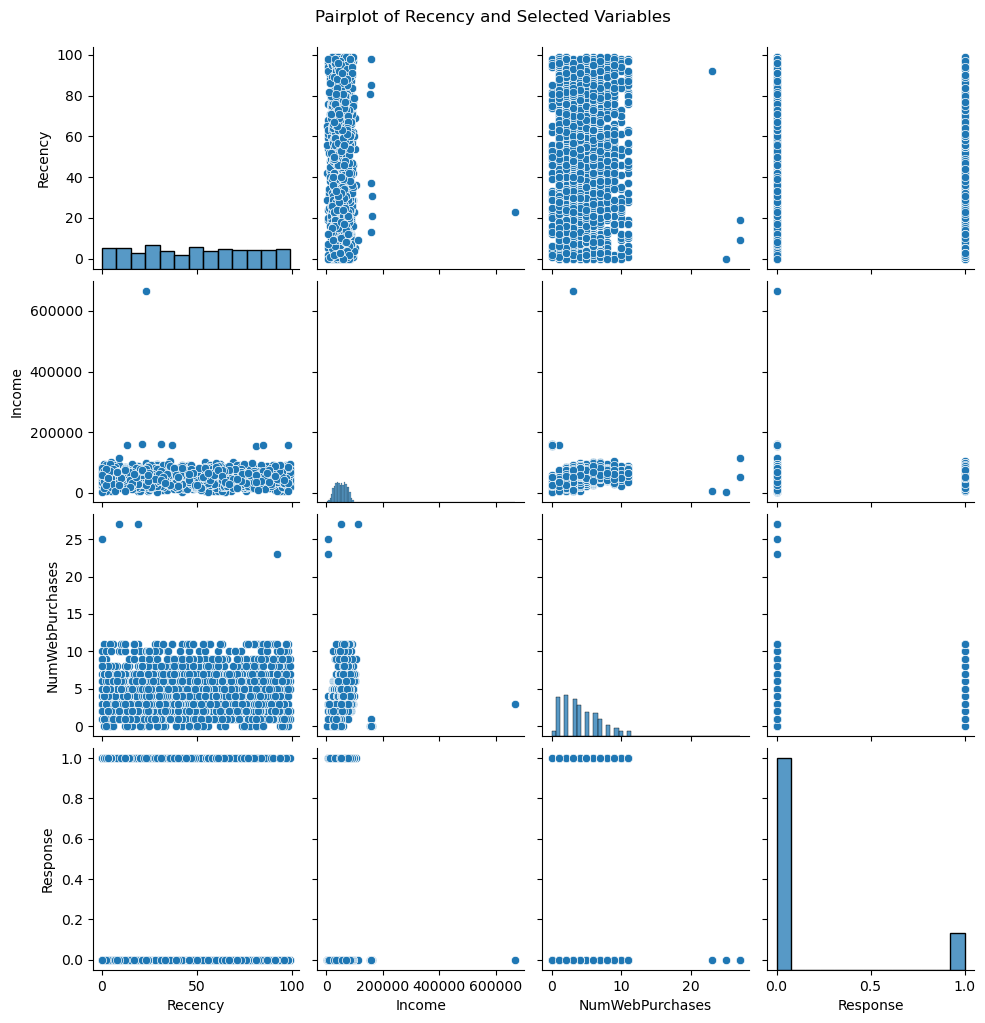

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram to visualize the distribution of recency
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Recency'], color='lightcoral')
plt.title('Boxplot of Recency')
plt.xlabel('Days Since Last Purchase')
plt.show()

# Summary statistics for recency
recency_summary = df['Recency'].describe()
print(recency_summary)

# Pairplot to explore relationships with other variables
sns.pairplot(df, vars=['Recency', 'Income', 'NumWebPurchases', 'Response'])
plt.suptitle('Pairplot of Recency and Selected Variables', y=1.02)
plt.show()


Visualisation for complain

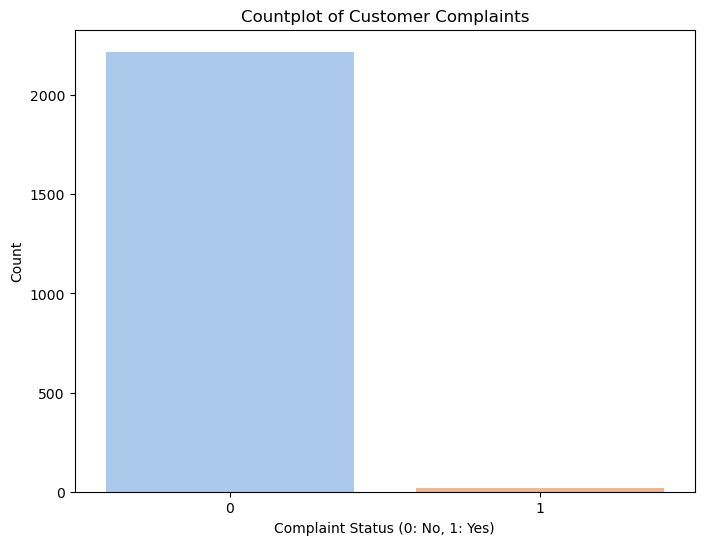

Percentage of customers with complaints: 0.94%


C:\Users\suhas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


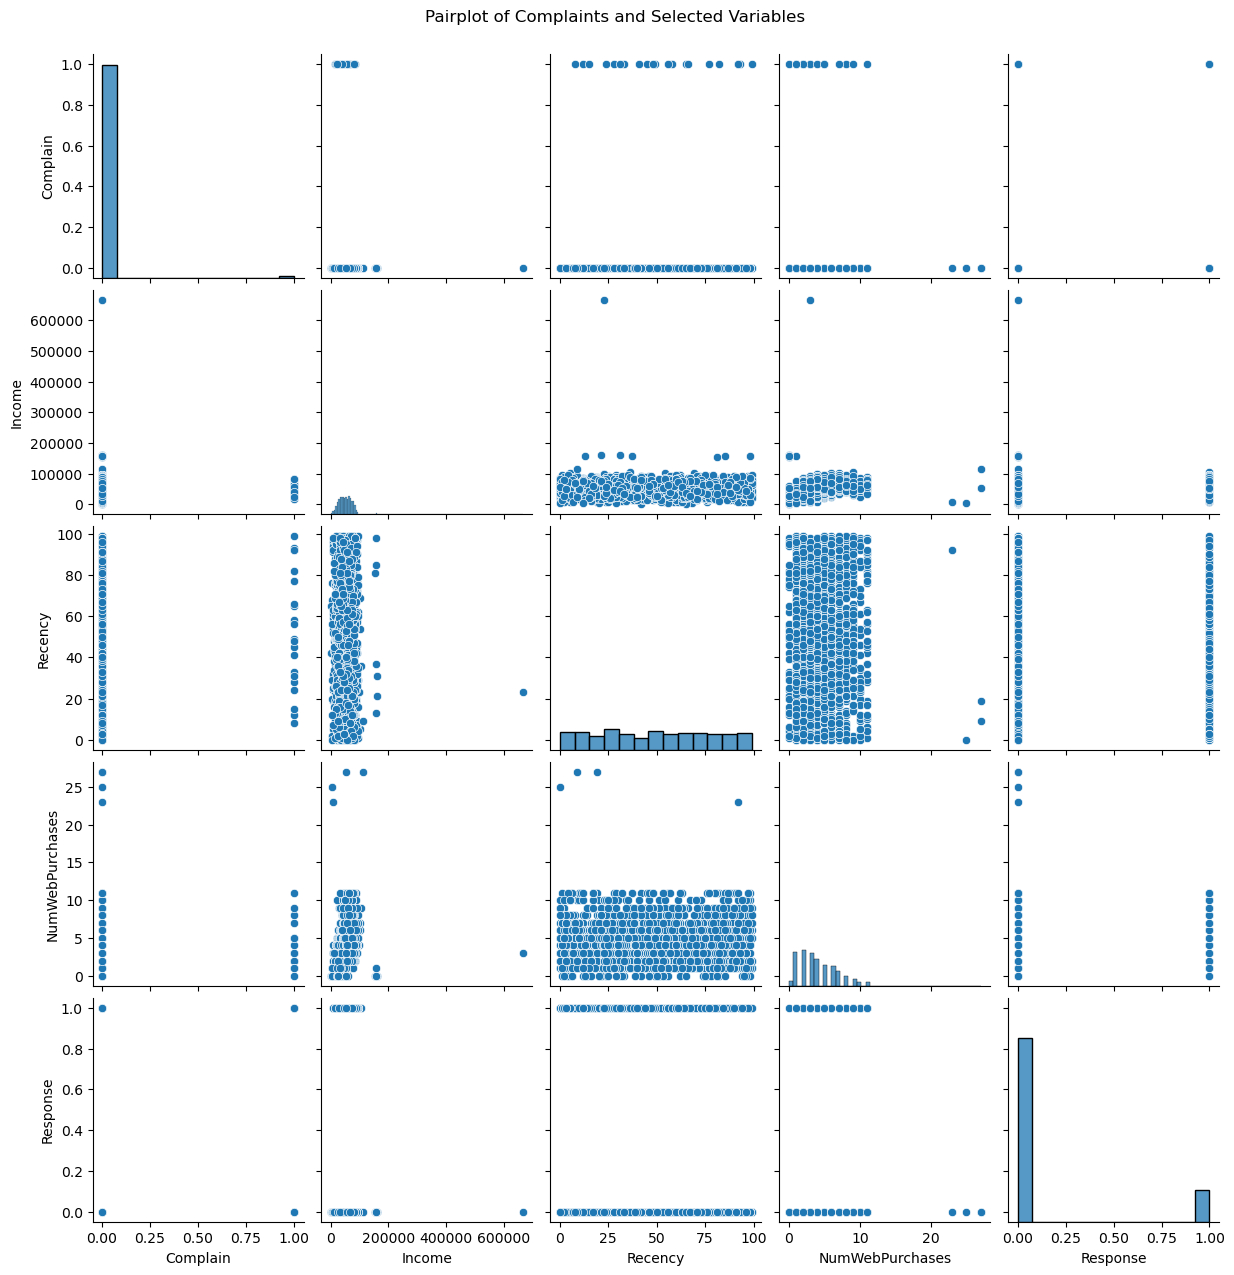

In [27]:

# Countplot to visualize the distribution of complaints
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Complain', palette='pastel')
plt.title('Countplot of Customer Complaints')
plt.xlabel('Complaint Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Percentage of customers with complaints
complaint_percentage = df['Complain'].mean() * 100
print(f"Percentage of customers with complaints: {complaint_percentage:.2f}%")

# Pairplot to explore relationships with other variables
sns.pairplot(df, vars=['Complain', 'Income', 'Recency', 'NumWebPurchases', 'Response'])
plt.suptitle('Pairplot of Complaints and Selected Variables', y=1.02)
plt.show()


Chi-squared test for Independence:

In [28]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['AcceptedCmp1'], df['Education'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared test p-value for AcceptedCmp1 and Education: {p_value}")


Chi-squared test p-value for AcceptedCmp1 and Education: 0.15344099462288696


In [29]:
contingency_table = pd.crosstab(df['AcceptedCmp2'], df['Education'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared test p-value for AcceptedCmp2 and Education: {p_value}")

Chi-squared test p-value for AcceptedCmp2 and Education: 0.32341433314738255


In [30]:
contingency_table = pd.crosstab(df['AcceptedCmp3'], df['Education'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared test p-value for AcceptedCmp3 and Education: {p_value}")

Chi-squared test p-value for AcceptedCmp3 and Education: 0.6645390299381544


In [31]:
contingency_table = pd.crosstab(df['AcceptedCmp4'], df['Education'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared test p-value for AcceptedCmp4 and Education: {p_value}")

Chi-squared test p-value for AcceptedCmp4 and Education: 0.058675443382880034


In [32]:
contingency_table = pd.crosstab(df['AcceptedCmp5'], df['Education'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared test p-value for AcceptedCmp5 and Education: {p_value}")

Chi-squared test p-value for AcceptedCmp5 and Education: 0.16111000614469148


In [33]:
from scipy.stats import ttest_ind

accepted_group = df[df['AcceptedCmp1'] == 1]['MntWines']
not_accepted_group = df[df['AcceptedCmp1'] == 0]['MntWines']

# T-test
t_stat, p_value_ttest = ttest_ind(accepted_group, not_accepted_group)
print(f"T-test p-value for MntWines and AcceptedCmp1: {p_value_ttest}")



T-test p-value for MntWines and AcceptedCmp1: 3.593497881366069e-67


Anova TEST

In [34]:
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


from scipy.stats import f_oneway

# Example for ANOVA
f_stat, p_value_anova = f_oneway(df['TotalSpending'][df['Education'] == 'Graduation'],
                                  df['TotalSpending'][df['Education'] == 'PhD'],
                                  df['TotalSpending'][df['Education'] == 'Master'])
print(f"ANOVA p-value for TotalSpending and Education: {p_value_anova}")



ANOVA p-value for TotalSpending and Education: 0.22357830759804426


1. ANOVA for TotalSpending and Education (p-value: 0.2236):

>The p-value is greater than the commonly used significance level of 0.05. Therefore, based on this test, you might not have enough evidence to reject the null hypothesis that the means of TotalSpending are equal across different levels of Education. There may not be a significant difference in total spending among different education levels.

2. Chi-squared test for AcceptedCmp1 and Education (p-value: 0.1534):

>The p-value is greater than the significance level of 0.05. Based on this test, you might not have enough evidence to reject the null hypothesis that there is no association between accepting Cmp1 and Education. In other words, the acceptance of Cmp1 may not be significantly associated with the level of education.

Removing  the outliers

In [42]:
columns_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                               'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                               'MntSweetProducts', 'MntGoldProds', 'Age', 'Income']

# Copy the original DataFrame to avoid modifying the original
df_no_outliers = df.copy()

# Loop through selected columns and remove outliers using IQR method
for column in columns_to_remove_outliers:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

# Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)



Shape of DataFrame after removing outliers: (1197, 29)


In [95]:
from scipy.stats import zscore

# Select columns for outlier removal excluding 'Age'
columns_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                               'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                               'MntSweetProducts', 'MntGoldProds','Age' ,'Income']

# Calculate z-scores for selected columns
z_scores = zscore(df[columns_to_remove_outliers])

# Define a threshold for z-scores (e.g., 3 or -3, based on your preference)
z_score_threshold = 3

# Remove rows with outliers based on z-scores
df_no_outliers = df[(abs(z_scores) < z_score_threshold).all(axis=1)]

# Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)
df1=df_no_outliers
df1

Shape of DataFrame after removing outliers: (1983, 35)


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Spending,Num_Children,Customer_Tenure,Total_Accepted_Campaigns,Interaction_Rate
0,5524,2,4,58138.0,0,0,2012-09-04,58,635,88,...,3,11,1,67,Elderly,1617,0,12,0,1.142857
1,2174,2,4,46344.0,1,1,2014-03-08,38,11,1,...,3,11,0,70,Elderly,27,2,10,0,0.200000
2,4141,2,5,71613.0,0,0,2013-08-21,26,426,49,...,3,11,0,59,Senior,776,0,11,0,2.000000
3,6182,2,5,26646.0,1,0,2014-02-10,26,11,4,...,3,11,0,40,Middle-aged,53,1,10,0,0.333333
4,5324,4,3,58293.0,1,0,2014-01-19,94,173,43,...,3,11,0,43,Middle-aged,422,1,10,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,2,3,34421.0,1,0,2013-07-01,81,3,3,...,3,11,0,50,Senior,30,1,11,0,0.142857
2236,4001,4,5,64014.0,2,1,2014-06-10,56,406,0,...,3,11,0,78,Elderly,444,3,10,1,1.142857
2237,7270,2,2,56981.0,0,0,2014-01-25,91,908,48,...,3,11,0,43,Middle-aged,1241,0,10,1,0.333333
2238,8235,3,5,69245.0,0,1,2014-01-24,8,428,30,...,3,11,0,68,Elderly,843,1,10,0,2.000000


1. IQR Method:

>The Interquartile Range (IQR) method is robust and relies on the quartiles of the data. It defines outliers as values outside a certain range from the first and third quartiles.

2. Z-Score Method:

>The z-score method is based on standard deviations from the mean. It identifies outliers as values that are beyond a certain number of standard deviations from the mean.

Feature Engineering

In [96]:
from datetime import datetime
# Feature 1: Create Age Groups
bins = [0, 25, 45, 65, float('inf')]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

# Feature 2: Total Spending
df1['Total_Spending'] = df1[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Feature 3: Number of Children
df1['Num_Children'] = df1['Kidhome'] + df1['Teenhome']

# Feature 4: Customer Tenure
current_year = datetime.now().year
df1['Customer_Tenure'] = current_year - pd.to_datetime(df1['Dt_Customer']).dt.year

# Feature 5: Accepted Campaigns Total
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df1['Total_Accepted_Campaigns'] = df1[campaign_columns].sum(axis=1)

# Feature 6: Interaction Rate
df1['Interaction_Rate'] = df1['NumWebPurchases'] / df1['NumWebVisitsMonth']

#Feature7: Total Purchase
num_purchases_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df1['TotalPurchases'] = df1[num_purchases_columns].sum(axis=1)


# Drop unnecessary columns
df1.drop(['Dt_Customer','Z_CostContact','Z_Revenue','Kidhome','Teenhome','ID','Recency','Complain'], axis=1, inplace=True)

# Save the modified DataFrame to a new CSV file
df1.to_csv('modified_data_with_features.csv', index=False)
df1


C:\Users\suhas\AppData\Local\Temp\ipykernel_28924\493739892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)
C:\Users\suhas\AppData\Local\Temp\ipykernel_28924\493739892.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total_Spending'] = df1[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
C:\Users\suhas\AppData\Local\Temp\ipykernel_28924\493739892.py:11: Set

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Response,Age,Age_Group,Total_Spending,Num_Children,Customer_Tenure,Total_Accepted_Campaigns,Interaction_Rate,TotalPurchases
0,2,4,58138.0,635,88,546,172,88,88,3,...,0,1,67,Elderly,1617,0,12,0,1.142857,25
1,2,4,46344.0,11,1,6,2,1,6,2,...,0,0,70,Elderly,27,2,10,0,0.200000,6
2,2,5,71613.0,426,49,127,111,21,42,1,...,0,0,59,Senior,776,0,11,0,2.000000,21
3,2,5,26646.0,11,4,20,10,3,5,2,...,0,0,40,Middle-aged,53,1,10,0,0.333333,8
4,4,3,58293.0,173,43,118,46,27,15,5,...,0,0,43,Middle-aged,422,1,10,0,1.000000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2,3,34421.0,3,3,7,6,2,9,1,...,0,0,50,Senior,30,1,11,0,0.142857,4
2236,4,5,64014.0,406,0,30,0,0,8,7,...,0,0,78,Elderly,444,3,10,1,1.142857,22
2237,2,2,56981.0,908,48,217,32,12,24,1,...,0,0,43,Middle-aged,1241,0,10,1,0.333333,19
2238,3,5,69245.0,428,30,214,80,30,61,2,...,0,0,68,Elderly,843,1,10,0,2.000000,23
